In [4]:
import numpy as np




In [7]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'rb') as f:
        words = set()
        word_to_vec_map = {}
        
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
            
    return words, word_to_vec_map


In [8]:
words, word_to_vec_map = read_glove_vecs('glove.6B/glove.6B.50d.txt')

In [20]:
list(word_to_vec_map.keys())[0]

b'the'

In [28]:
father = word_to_vec_map[b'father']

In [25]:
mother = word_to_vec_map[b"mother"]


In [26]:
def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similariy between u and v
        
    Arguments:
        u -- a word vector of shape (n,)          
        v -- a word vector of shape (n,)

    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """
    
    distance = 0.0
    
    # Compute the dot product between u and v (≈1 line)
    dot = np.dot(u,v)
    # Compute the L2 norm of u (≈1 line)
    norm_u = np.linalg.norm(u)    
    # Compute the L2 norm of v (≈1 line)
    norm_v = np.linalg.norm(v)
    # Compute the cosine similarity defined by formula (1) (≈1 line)
    cosine_similarity = dot/(norm_u*norm_v)

    return cosine_similarity

In [30]:
%time
cosine_similarity(father,mother)

Wall time: 0 ns


0.8909038442893615

In [32]:
%time
len(words)

Wall time: 995 µs


400001

In [33]:
from nltk.cluster import KMeansClusterer
import nltk

In [34]:
from sklearn import cluster
from sklearn import metrics

In [35]:
sentences = [['this', 'is', 'the', 'one','good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['weather', 'rain', 'snow'],
            ['yesterday', 'weather', 'snow'],
            ['forecast', 'tomorrow', 'rain', 'snow'],
            ['this', 'is', 'the', 'new', 'post'],
            ['this', 'is', 'about', 'more', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']]

In [36]:
sentences[0]

['this', 'is', 'the', 'one', 'good', 'machine', 'learning', 'book']

In [37]:
word_to_vec_map[b'this']

array([ 5.3074e-01,  4.0117e-01, -4.0785e-01,  1.5444e-01,  4.7782e-01,
        2.0754e-01, -2.6951e-01, -3.4023e-01, -1.0879e-01,  1.0563e-01,
       -1.0289e-01,  1.0849e-01, -4.9681e-01, -2.5128e-01,  8.4025e-01,
        3.8949e-01,  3.2284e-01, -2.2797e-01, -4.4342e-01, -3.1649e-01,
       -1.2406e-01, -2.8170e-01,  1.9467e-01,  5.5513e-02,  5.6705e-01,
       -1.7419e+00, -9.1145e-01,  2.7036e-01,  4.1927e-01,  2.0279e-02,
        4.0405e+00, -2.4943e-01, -2.0416e-01, -6.2762e-01, -5.4783e-02,
       -2.6883e-01,  1.8444e-01,  1.8204e-01, -2.3536e-01, -1.6155e-01,
       -2.7655e-01,  3.5506e-02, -3.8211e-01, -7.5134e-04, -2.4822e-01,
        2.8164e-01,  1.2819e-01,  2.8762e-01,  1.4440e-01,  2.3611e-01])

In [38]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            w = bytes(w, encoding= 'cp1252')
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, word_to_vec_map))  

In [44]:
assert len(X) == len(sentences)

In [218]:
NUM_CLUSTERS=30

In [207]:
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X[1:51], assign_clusters=True)
print (assigned_clusters)

[7, 13, 14, 18, 13, 12, 17, 14, 11, 11, 5, 15, 12, 6, 19, 16, 6, 12, 2, 8, 12, 10, 14, 9, 12, 4, 3, 6, 3, 3, 13, 1, 16, 9, 4, 13, 6, 16, 4, 10, 16, 6, 13, 16, 0, 16, 6, 3, 19, 6]


In [208]:
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))

7:['this', 'is', 'the', 'one', 'good', 'machine', 'learning', 'book']
13:['this', 'is', 'another', 'book']
14:['one', 'more', 'book']
18:['weather', 'rain', 'snow']
13:['yesterday', 'weather', 'snow']
12:['forecast', 'tomorrow', 'rain', 'snow']
17:['this', 'is', 'the', 'new', 'post']
14:['this', 'is', 'about', 'more', 'machine', 'learning', 'post']
11:['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']


In [269]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X[1:51])
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
#print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X[1:51]))
  
silhouette_score = metrics.silhouette_score(X[1:51], labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[2 2 2 1 2 2 1 1 1 2 2 1 2 1 2 2 2 2 0 2 0 0 2 2 0 0 0 2 0 0 2 0 1 2 0 2 1
 1 0 0 2 2 2 2 2 2 0 0 2 2]
Centroids data
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1.8002835211594777
Silhouette_score: 
0.23698345547828745


In [237]:
word_to_vec_map[b'father']

array([ 0.095496 ,  0.70418  , -0.40777  , -0.80844  ,  1.256    ,
        0.77071  , -1.0695   ,  0.76847  , -0.87813  , -0.0080954,
        0.43884  ,  1.0476   , -0.45071  , -0.58931  ,  0.83246  ,
       -0.038442 , -0.73533  ,  0.26389  ,  0.12617  ,  0.57623  ,
       -0.23866  ,  1.0922   , -0.3367   ,  0.081537 ,  0.84798  ,
       -2.4795   , -0.40351  , -0.84087  ,  0.12034  ,  0.29074  ,
        1.9711   , -0.50886  , -0.45977  , -0.13617  ,  0.55613  ,
        0.22924  , -0.18947  ,  0.43544  ,  0.65151  ,  0.043537 ,
       -0.1162   ,  0.72196  , -0.66163  , -0.17272  ,  0.27367  ,
       -0.28169  , -0.82025  , -1.5089   ,  0.052787 , -0.035579 ])

In [240]:
len(word_to_vec_map.keys())

400001

In [ ]:
words = word_to_vec_map.keys()
max_cosine_sim = -100              # Initialize max_cosine_sim to a large negative number
best_word = None    

In [284]:
len(centroids)

3

In [303]:
set(words)-stop_words

{b'aponso',
 b'wca',
 b'wiktor',
 b'slavi\xc5\xa1a',
 b'midgette',
 b'bastianich',
 b'79th',
 b'netguide',
 b'e5',
 b'50-company',
 b'gremio',
 b'vudu',
 b'dumfries',
 b'ensete',
 b'riograndense',
 b'benward',
 b'7.5-mile',
 b'literature-related',
 b'battlezone',
 b'karlgaard',
 b'leonowens',
 b'nadu',
 b'1,683',
 b'tenuta',
 b'spiro',
 b'air',
 b'131,000',
 b'hamayoun',
 b'russelsheim',
 b'princedoms',
 b'reinemund',
 b'kova\xc4\x8dica',
 b'januszewski',
 b'substituents',
 b'roulette',
 b'mitigated',
 b'158-year',
 b'befit',
 b'reinsert',
 b'farsi',
 b'rovine',
 b'jolokia',
 b'giordani',
 b'19.69',
 b'pkwy',
 b'feistiness',
 b'patara',
 b'28.12',
 b'ironies',
 b'sneakily',
 b'goers',
 b'transfered',
 b'razorbills',
 b'joanette',
 b'shover',
 b'genaro',
 b'sacchini',
 b'kartman',
 b'muenscher',
 b'eurofloorball',
 b'cincy',
 b'sfar',
 b'geisha',
 b'nouvel',
 b'kurd',
 b'windlass',
 b'birdwell',
 b'non-greek',
 b'unmilled',
 b'rode',
 b'tembagapura',
 b'topi',
 b'hoult',
 b'30-knot',
 b

In [306]:
from collections import OrderedDict

In [307]:
               # Initialize best_word with None, it will help keep track of the word to output
#find the closed n word
# loop over the whole word vector set
list_of_cosine_sim={}
for w in set(words)-stop_words:        

    # Compute cosine similarity between the vector (e_b - e_a) and the vector ((w's vector representation) - e_c)  (≈1 line)
    cosine_sim = cosine_similarity(centroids[2], word_to_vec_map[w])
    
    list_of_cosine_sim[w.decode("utf-8")] = cosine_sim
    # If the cosine_sim is more than the max_cosine_sim seen so far,
        # then: set the new max_cosine_sim to the current cosine_sim and the best_word to the current word (≈3 lines)
    if cosine_sim > max_cosine_sim:
        max_cosine_sim = cosine_sim
        best_word = w
    ### END CODE HERE ###

print(best_word)

b'any'


In [312]:
OrderedDict(sorted(list_of_cosine_sim.items(), key=lambda t: t[1],reverse=True))


OrderedDict([('any', 0.9012321820782008),
             ('moreover', 0.8863150030810755),
             ('certain', 0.8853577252927365),
             ('making', 0.8830350219666259),
             ('further', 0.8816940927595442),
             ('its', 0.8768149106605397),
             ('terms', 0.8755551780237978),
             ('rather', 0.8748484722039411),
             ('possible', 0.8746308676299824),
             ('result', 0.872077650480307),
             ('without', 0.8720017667739198),
             ('provide', 0.8718668549564739),
             ('because', 0.8718316507157696),
             ('means', 0.8686446990011927),
             ('considering', 0.8686191686697666),
             ('meant', 0.8682372846766147),
             ('limited', 0.8669222267550641),
             ('for', 0.86338329071827),
             ('should', 0.8625278263026248),
             ('that', 0.8597304202231472),
             ('significant', 0.8594984760504781),
             ('necessary', 0.8591698380957038),
    

7 ['this', 'is', 'the', 'one', 'good', 'machine', 'learning', 'book']
13 ['this', 'is', 'another', 'book']
14 ['one', 'more', 'book']
18 ['weather', 'rain', 'snow']
13 ['yesterday', 'weather', 'snow']
12 ['forecast', 'tomorrow', 'rain', 'snow']
17 ['this', 'is', 'the', 'new', 'post']
14 ['this', 'is', 'about', 'more', 'machine', 'learning', 'post']
11 ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']


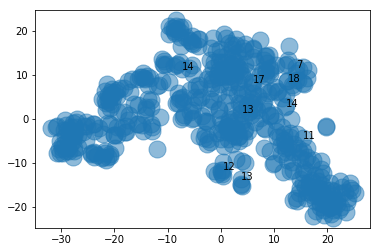

In [217]:
%matplotlib inline
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X[1:501])
 
 
plt.scatter(Y[:, 0], Y[:, 1], s=290,alpha=.5)
 
 
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  sentences[j]))
 
 
plt.show()

In [55]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\8135t\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [56]:
from nltk.corpus import stopwords 
stop_words=set(stopwords.words("english")) 


In [94]:
from pathlib import Path


In [95]:
pathlist = Path("Data_Small").glob('**/*.txt')
Z = []
for path in pathlist:
    print(path)
    with path.open("rb") as f: 
        text = f.readline()
        Z.append(text)
        

Data_Small\1800FLOWERSCOMInc.txt
Data_Small\2UInc.txt
Data_Small\3DSystemsCorporation.txt


In [108]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\8135t\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [106]:
def get_tokens(doclist):
    token_list = []
    for doc in doclist:
        dirty_tokens = nltk.word_tokenize(doc)
        token_list += [dirty_tokens]
    return token_list


In [113]:
Z[0].lower()

b'[1] "item 1a. risk factors. cautionary statements under the private securities litigation reform act of 1995. our disclosures and analysis in this form 10-k contain some forward-looking statements that set forth anticipated results based on management\x92s plans and assumptions. from time to time, we also provide forward-looking statements in other statements we release to the public as well as oral forward-looking statements. such statements give our current expectations or forecasts of future events; they do not relate strictly to historical or current facts. we have tried, wherever possible, to identify such statements by using words such as \x93anticipate,\x94 \x93estimate,\x94 \x93expect,\x94 \x93project,\x94 \x93intend,\x94 \x93plan,\x94 \x93believe\x94 and similar expressions in connection with any discussion of future operating or financial performance. in particular, these include statements relating to future actions; the effectiveness of our marketing programs; the perform

In [117]:
Z[0][:100].decode("cp1252") 

'[1] "Item 1A. Risk Factors. Cautionary Statements Under the Private Securities Litigation Reform Act'

In [118]:
import re
result = re.sub(r'\d+', '', Z[0][:100].decode("cp1252") )
print(result)

[] "Item A. Risk Factors. Cautionary Statements Under the Private Securities Litigation Reform Act


In [132]:
import string
translator=str.maketrans('','',string.punctuation)
result=Z[0][:100].decode("cp1252").translate(translator)

print(result)

1 Item 1A Risk Factors Cautionary Statements Under the Private Securities Litigation Reform Act


In [131]:
Z[0][:100].decode("utf-8")

'[1] "Item 1A. Risk Factors. Cautionary Statements Under the Private Securities Litigation Reform Act'

In [133]:
from nltk.tokenize import word_tokenize

In [134]:
tokens = word_tokenize(Z[0][:100].decode("cp1252"))

In [245]:
#https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908

def text_preprocessor(raw_text):
    lower_lettered = raw_text.lower()
    
    digit_removed = re.sub(r'\d+', '', lower_lettered )
    
    punct_removed = re.sub(r'[^\w\s]','',digit_removed)
    
    word_tokenized = word_tokenize(punct_removed)
    
    result = [i for i in word_tokenized if not i in stop_words]
    
    #print(len(result))
    return set(result)



In [248]:
#https://stackoverflow.com/questions/29419322/unicodedecodeerror-utf8-codec-cant-decode-byte-0x92-in-position-377826-inva
examplee = text_preprocessor(Z[1].decode("cp1252"))

In [250]:
len(examplee)

1209

In [183]:
%time
text_preprocessor(Z[1].decode("cp1252"))

Wall time: 0 ns
9622


['item',
 'risk',
 'factors',
 'addition',
 'information',
 'set',
 'forth',
 'annual',
 'report',
 'form',
 'k',
 'carefully',
 'consider',
 'factors',
 'discussed',
 'special',
 'note',
 'regarding',
 'forwardlooking',
 'statements',
 'annual',
 'report',
 'form',
 'k',
 'risks',
 'related',
 'business',
 'model',
 'operations',
 'growth',
 'strategy',
 'limited',
 'operating',
 'history',
 'makes',
 'difficult',
 'predict',
 'future',
 'financial',
 'operating',
 'results',
 'may',
 'achieve',
 'expected',
 'financial',
 'operating',
 'results',
 'future',
 'incorporated',
 'launched',
 'first',
 'graduate',
 'program',
 'july',
 'acquired',
 'getsmarter',
 'extended',
 'offerings',
 'include',
 'premium',
 'online',
 'short',
 'courses',
 'offered',
 'collaboration',
 'universities',
 'result',
 'limited',
 'operating',
 'history',
 'ability',
 'forecast',
 'future',
 'operating',
 'results',
 'including',
 'revenue',
 'cash',
 'flows',
 'profitability',
 'limited',
 'subject',
 'n

In [188]:
def doc_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            w = bytes(w, encoding= 'cp1252')
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
cc= doc_vectorizer(examplee, word_to_vec_map)

In [185]:
cc

array([ 0.29392095, -0.02814916,  0.19800293,  0.10353902,  0.02264683,
        0.09741165, -0.24246028, -0.18056339,  0.24526561,  0.11071255,
        0.21230951,  0.14835337, -0.06398728, -0.2066593 ,  0.28045456,
        0.25908171, -0.15759164, -0.13547086,  0.12436272, -0.5201101 ,
        0.46793182, -0.2645236 , -0.05805466, -0.12691133, -0.15201626,
       -0.9624277 , -0.22518069, -0.22538817,  0.3137948 ,  0.15960904,
        2.57881082,  0.25727077,  0.01439641, -0.49626613, -0.0173823 ,
       -0.09582709, -0.08410878,  0.08702243, -0.0877135 , -0.16509407,
       -0.13058449, -0.207033  ,  0.24801178,  0.31538981, -0.07208869,
       -0.08224966, -0.17717924,  0.41600421,  0.07764242,  0.13840443])

In [251]:
start = timer()
pathlist = Path("Data").glob('**/*.txt')
Z = []
for path in pathlist:
    #print(path)
    with path.open("rb") as f: 
        text = f.readline()
        Z.append(text)
end = timer()
print(end - start)
        

1.450513832121942


In [252]:
len(Z)

3102

In [253]:
start = timer()
Y=[]
for raw_text in Z:
   Y.append(text_preprocessor(raw_text.decode("cp1252"))) 
end = timer()
print(end - start)

316.0578639108935


In [254]:
len(Y)

3102

In [255]:
Y[1]

{'fulfill',
 'believes',
 'oversupply',
 'accessibility',
 'payment',
 'affiliates',
 'wildfires',
 'manner',
 'promoting',
 'american',
 'beyond',
 'peak',
 'purchased',
 'scope',
 'new',
 'trademarks',
 'agricultural',
 'different',
 'cyber',
 'thirdparties',
 'bodies',
 'impact',
 'reduction',
 'visitors',
 'similar',
 'expose',
 'mind',
 'sells',
 'choose',
 'embarks',
 'eg',
 'regarding',
 'relationship',
 'levels',
 'capacity',
 'property',
 'receipt',
 'acquisitions',
 'materialize',
 'physical',
 'undertake',
 'class',
 'misappropriations',
 'fire',
 'positions',
 'business',
 'include',
 'programs',
 'websites',
 'hardware',
 'investors',
 'sublease',
 'interpretation',
 'volume',
 'online',
 'capital',
 'quality',
 'breaches',
 'manufacture',
 'often',
 'pursuant',
 'disclose',
 'bear',
 'flowerscom',
 'welltrained',
 'obtained',
 'commissions',
 'agreement',
 'forwardlooking',
 'clean',
 'respond',
 'act',
 'noted',
 'shortage',
 'enforce',
 'staff',
 'function',
 'copyright

In [199]:
from timeit import default_timer as timer

start = timer()
# ...
print("rere")
end = timer()
print(end - start)

rere
0.0004155364240432391


In [256]:
X=[]
start = timer()
for token in Y:
    X.append(doc_vectorizer(token, word_to_vec_map))
print(timer()-start)

18.572402816189424


In [200]:
len(X)

3102

In [270]:
X

[array([], dtype=float64),
 array([ 0.27632832, -0.08605368,  0.10415649, -0.02213935,  0.04195891,
         0.14093322, -0.11802919, -0.14368889,  0.24562375,  0.10015955,
         0.10924635,  0.10760237,  0.00408175, -0.15826457,  0.24078876,
         0.21178271, -0.04954466, -0.16380799,  0.16438107, -0.41794194,
         0.34245279, -0.21205412, -0.01375916, -0.10899581, -0.05992423,
        -0.89992691, -0.16916158, -0.16119059,  0.33751676,  0.15636376,
         2.35201653,  0.17489572, -0.02233874, -0.50008791, -0.00206238,
        -0.01263049, -0.0559272 ,  0.04838511, -0.17601687, -0.12854761,
        -0.16476787, -0.16729023,  0.25342095,  0.31153319, -0.09347735,
        -0.08031522, -0.1028154 ,  0.44815435,  0.05830236,  0.10446263]),
 array([ 0.23612614, -0.08715205,  0.04948926, -0.06788523,  0.01288638,
         0.16077804, -0.03803509, -0.12650426,  0.2056528 ,  0.09596832,
         0.10229653,  0.10113542, -0.01054032, -0.12597394,  0.16023106,
         0.16596467, -

In [271]:
from sklearn.cluster import DBSCAN

In [278]:
clustering = DBSCAN(eps=0.1, min_samples=2).fit(X[1:501])

In [279]:
clustering.labels_

array([-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1,  2,  1, -1,  1,  3, -1,  1, -1, -1,
        4, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  3, -1,  3, -1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1,  5,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  6, -1, -1, -1, -1, -1, -1, -1,  7,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1,  1, -1,  8, -1, -1,  9, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, 10, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,  4, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  8, -1, -1, -1, -1, -1,
       -1,  0,  3, -1,  2

In [282]:
clustering.core_sample_indices_

array([  4,  18,  25,  26,  28,  29,  31,  34,  38,  47,  53,  57,  61,
        63,  67,  71,  75,  76,  77,  92,  93, 101, 107, 121, 125, 127,
       130, 145, 177, 190, 199, 201, 215, 222, 223, 225, 231, 233, 246,
       249, 254, 265, 273, 279, 287, 316, 317, 334, 380, 382, 383, 397,
       410, 411, 413, 421, 424, 440, 445, 480, 487], dtype=int64)